In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely import wkt
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/nmd/Projects/mlup/git-ufo-map')
from ufo_map.Utils.helpers import import_csv_w_wkt_to_gdf,save_csv_wkt,get_all_paths
CRS_UNI = 'EPSG:3035'

In [5]:
## read in chunks
path = '/media/nmd/Krzrzrz/data-eubucco/Italy/abruzzo/abruzzo-gov-3035_geoms.csv'
chunksize = int(3e4)

In [40]:
df = pd.read_csv('/media/nmd/Krzrzrz/data-eubucco/Italy/abruzzo/abruzzo-gov_attrib.csv').drop(columns=['id'])

In [41]:
gdf = import_csv_w_wkt_to_gdf(path,CRS_UNI)

In [42]:
gdf = pd.concat([gdf,df],axis=1)

In [43]:
len(gdf)

303242

In [44]:
gdf.loc[gdf.duplicated(subset='id')]

,Unnamed: 0,id,geometry,height,type_source,type,age,floors,source_file
2306,2306,1345250.0,"POLYGON ((4616119.834 2087143.170, 4616107.570...",6.49,Industriale,NaN,NaN,NaN,CR01G_EDIFICI
2755,2755,1426965.0,"POLYGON ((4674173.246 2108427.959, 4674168.366...",6.92,Abitativa,NaN,NaN,NaN,CR01G_EDIFICI
2851,2851,1427484.0,"POLYGON ((4674127.887 2109220.241, 4674128.183...",8.31,Abitativa,NaN,NaN,NaN,CR01G_EDIFICI
4072,4072,1362022.0,"POLYGON ((4616677.546 2087063.677, 4616677.546...",3.44,Abitativa,NaN,NaN,NaN,CR01G_EDIFICI
4259,4259,1286186.0,"POLYGON ((4617501.266 2087103.405, 4617501.267...",4.04,Agricolturale,NaN,NaN,NaN,CR01G_EDIFICI
...,...,...,...,...,...,...,...,...,...
302535,302535,1357726.0,"POLYGON ((4664711.372 2157323.461, 4664711.372...",8.42,Industriale,NaN,NaN,NaN,CR01G_EDIFICI
302547,302547,1351267.0,"POLYGON ((4664775.805 2156075.883, 4664775.806...",9.60,Industriale,NaN,NaN,NaN,CR01G_EDIFICI
302553,302553,1351470.0,"POLYGON ((4661298.935 2157152.901, 4661298.935...",12.37,Industriale,NaN,NaN,NaN,CR01G_EDIFICI
303187,303187,1302270.0,"POLYGON ((4611282.507 2131137.757, 4611282.985...",4.44,Agricolturale,NaN,NaN,NaN,CR01G_EDIFICI


In [45]:
gdf.loc[gdf.id==1345250.0]

,Unnamed: 0,id,geometry,height,type_source,type,age,floors,source_file
1001,1001,1345250.0,"POLYGON ((4616165.131 2087179.837, 4616142.282...",6.49,Industriale,NaN,NaN,NaN,CR01G_EDIFICI
2306,2306,1345250.0,"POLYGON ((4616119.834 2087143.170, 4616107.570...",6.49,Industriale,NaN,NaN,NaN,CR01G_EDIFICI


<AxesSubplot:>

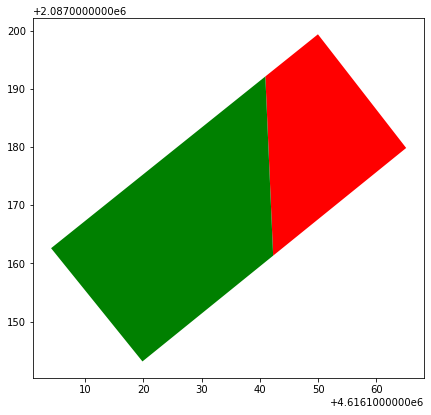

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
gdf.loc[gdf.id==1345250.0].iloc[[0]].plot(ax=ax,color='red')
gdf.loc[gdf.id==1345250.0].iloc[[1]].plot(ax=ax,color='green')

## dissolve

In [46]:
gdf2 = gdf.loc[gdf.duplicated(subset='id',keep=False)]

In [47]:
gdf2 = gdf2.dissolve(by='id')

In [48]:
gdf2

,geometry,Unnamed: 0,height,type_source,type,age,floors,source_file
id,,,,,,,,
15027.0,"POLYGON ((4653987.449 2081683.037, 4653988.373...",10651,28.39,Non conosciuto,NaN,NaN,NaN,CR01G_EDIFICI
15028.0,"POLYGON ((4654017.461 2081694.211, 4654016.489...",10652,16.51,Non conosciuto,NaN,NaN,NaN,CR01G_EDIFICI
15270.0,"POLYGON ((4667943.832 2161374.798, 4667943.303...",48181,48.17,Non conosciuto,NaN,NaN,NaN,CR01G_EDIFICI
1279297.0,"POLYGON ((4655836.152 2079159.878, 4655831.950...",14564,3.81,Non conosciuto,NaN,NaN,NaN,CR01G_EDIFICI
1279298.0,"POLYGON ((4657963.511 2079377.661, 4657953.045...",14575,3.76,Non conosciuto,NaN,NaN,NaN,CR01G_EDIFICI
...,...,...,...,...,...,...,...,...
1711973.0,"MULTIPOLYGON (((4641694.847 2205746.638, 46416...",92847,12.49,Abitativa,NaN,NaN,NaN,CR01G_EDIFICI
1711998.0,"MULTIPOLYGON (((4641689.885 2205848.504, 46416...",93386,3.81,Abitativa,NaN,NaN,NaN,CR01G_EDIFICI
1712047.0,"POLYGON ((4641673.907 2206007.538, 4641673.907...",93336,7.49,Abitativa,NaN,NaN,NaN,CR01G_EDIFICI


<AxesSubplot:>

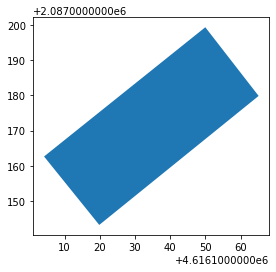

In [ ]:
# your previous geom

gdf2.loc[[1345250.0]].plot()

<AxesSubplot:>

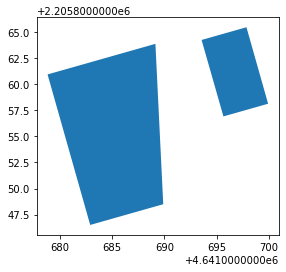

In [ ]:
# will generate multipoly if buildings are separate

gdf2.loc[[1711998.0]].plot()

# Run

In [49]:
gdf = gdf.dissolve(by='id')

In [50]:
gdf['id'] = gdf.index
gdf = gdf.drop(columns=['Unnamed: 0'])

In [ ]:
save_csv_wkt(gdf,'/media/nmd/Krzrzrz/data-eubucco/Italy/abruzzo/abruzzo-gov-3035_geoms_clean.csv')

In [56]:
gdf[['id','geometry']].to_csv('/media/nmd/Krzrzrz/data-eubucco/Italy/abruzzo/abruzzo-gov-3035_geoms_clean.csv')

In [52]:
gdf.drop(columns=['geometry']).to_csv('/media/nmd/Krzrzrz/data-eubucco/Italy/abruzzo/abruzzo-gov-attrib_clean.csv')

In [53]:
len(gdf)

296429